<a href="https://colab.research.google.com/github/Kymapo/AMATH581/blob/main/AMATH581HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrix A1 (Laplacian ∂²/∂x² + ∂²/∂y²):
[[-0.64  0.16  0.   ...  0.    0.    0.  ]
 [ 0.16 -0.64  0.16 ...  0.    0.    0.  ]
 [ 0.    0.16 -0.64 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.64  0.16  0.  ]
 [ 0.    0.    0.   ...  0.16 -0.64  0.16]
 [ 0.    0.    0.   ...  0.    0.16 -0.64]] 

Matrix A2 (Derivative in x-direction ∂/∂x):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

Matrix A3 (Derivative in y-direction ∂/∂y):
[[ 0.   0.2  0.  ...  0.   0.   0. ]
 [-0.2  0.   0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.2  0. ]
 [ 0.   0.   0.  ... -0.2  0.   0.2]
 [ 0.   0.   0.  ...  0.  -0.2  0. ]]


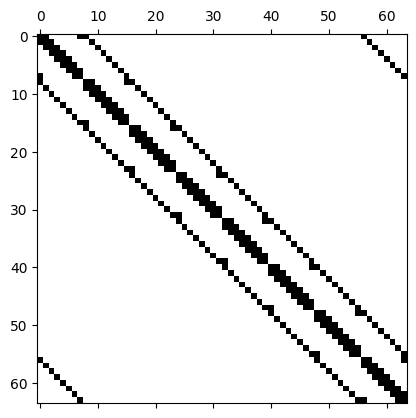

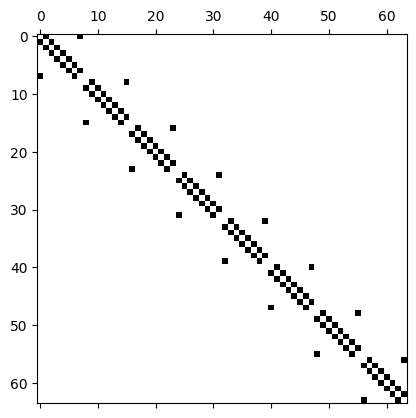

In [20]:
import numpy as np
from scipy.sparse import spdiags, kron, eye
import matplotlib.pyplot as plt

# Parameters
L = 20  # Length of the domain in x and y directions (from -10 to 10)
n = 8   # Number of grid points in each direction
dx = L / n  # Grid spacing

# Finite difference stencils
laplacian_data = np.array([np.ones(n), -2 * np.ones(n), np.ones(n)])  # For second derivative
first_derivative_data = np.array([-0.5 * np.ones(n), np.zeros(n), 0.5 * np.ones(n)])  # For first derivative

# Generate 1D second derivative (Laplacian) matrix with periodic boundary conditions
D2 = spdiags(laplacian_data, [-1, 0, 1], n, n) / dx**2
D2 = D2.tolil()
D2[0, -1] = 1 / dx**2  # periodic condition on the left edge
D2[-1, 0] = 1 / dx**2  # periodic condition on the right edge

# Generate 1D first derivative matrices (with periodic BCs)
D1x = spdiags(first_derivative_data, [-1, 0, 1], n, n) / dx
D1x = D1x.tolil()
D1x[0, -1] = -0.5 / dx  # periodic condition for left edge
D1x[-1, 0] = 0.5 / dx   # periodic condition for right edge

D1y = D1x.copy()  # same for y since it's a square grid

# Convert matrices to CSR format for further operations
D2 = D2.tocsr()
D1x = D1x.tocsr()
D1y = D1y.tocsr()

# 2D Laplacian using Kronecker product for ∂²x + ∂²y
A = kron(D2, eye(n)) + kron(eye(n), D2)

# 2D first derivatives in x and y directions using Kronecker product
B = kron(D1x, eye(n))
C = kron(eye(n), D1y)

# Convert sparse matrices to full matrices as required
A1 = A.toarray()
A2 = B.toarray()
A3 = C.toarray()

# A1, A2, and A3 are the full matrices for ∂²x + ∂²y, ∂x, and ∂y respectively
print("Matrix A1 (Laplacian ∂²/∂x² + ∂²/∂y²):")
print(A1, "\n")
print("Matrix A2 (Derivative in x-direction ∂/∂x):")
print(A2, "\n")
print("Matrix A3 (Derivative in y-direction ∂/∂y):")
print(A3)
plt.spy(A1)
plt.show()
plt.spy(A2)
plt.show
plt.spy(A3)